### Problem & Data Overview

**Problem Statement** : Given a directed social graph, predict missing links to recommend users (Link Prediction in graph)
<br><br>

**Data** : https://www.kaggle.com/competitions/FacebookRecruiting/data
<br><br>

**Mapping Problem to Supervised ML Problem**: <br>
- The problem can be thought of as a binary classification problem <br>
If link exists/should exist : 1 <br>
If link doesn't exist : 0



### Business Constraints & Performance Metric

- No low-latency requirement
- The probability of recommendation/link should be predicted so that top k recommendations can be used.
- Both Precision & Recall are important
- F1 score can be used

### Import libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

In [142]:
parent_folder = "/content/drive/MyDrive/AAIC/Projects/Facebook Friend Recommendation /data"
filepath = "/content/drive/MyDrive/AAIC/Projects/Facebook Friend Recommendation /data/train.csv"

df = pd.read_csv(filepath)

### Basic overview

In [143]:
df.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB


In [145]:
# check for rows with null values
df[df.isna().any(axis=1)]

,source_node,destination_node


In [146]:
# check for duplicate entries
sum(df.duplicated())

0

In [147]:
# save csv without header
without_header_filepath = parent_folder + "/train_without_header.csv"
df.to_csv(without_header_filepath, header=False, index=False)

In [148]:
g = nx.read_edgelist(without_header_filepath, delimiter=',', create_using=nx.DiGraph(), nodetype=int)
print(nx.info(g))

DiGraph with 1862220 nodes and 9437519 edges


In [149]:
# draw subgraph
df_50 = pd.read_csv(without_header_filepath, nrows=50)
df_50.to_csv("temp.csv", header=False, index=False)

subgraph = nx.read_edgelist("temp.csv", delimiter=',', create_using=nx.DiGraph(), nodetype=int)

In [150]:
nx.info(subgraph)

'DiGraph with 66 nodes and 50 edges'

In [151]:
# reference : https://stackoverflow.com/questions/40266604/
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!sudo pip install pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
python3-dev is already the newest version (3.6.7-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


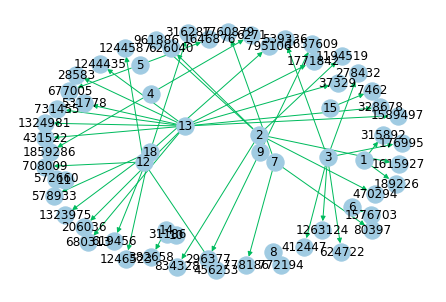

In [152]:
pos=nx.spring_layout(subgraph)
# pos=graphviz_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)

## EDA

### Followers (In-Degree)

In [153]:
print(f"Number of unique nodes/users : {len(g.nodes())}")

Number of unique nodes/users : 1862220


In [154]:
in_degree_list = list(dict(g.in_degree()).values())
in_degree_list.sort()

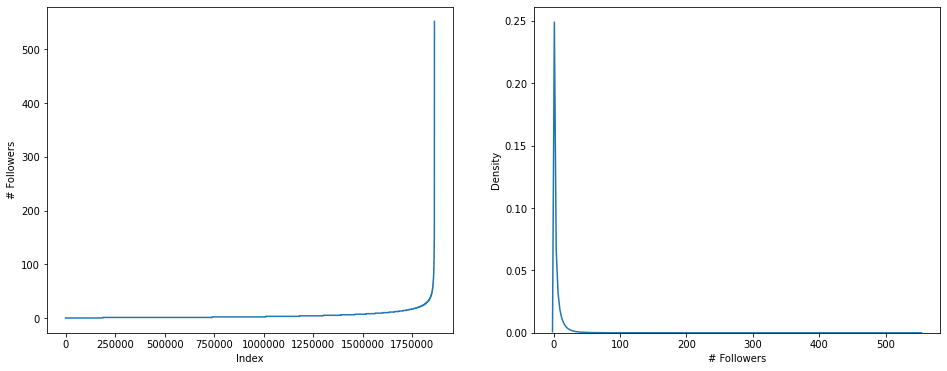

In [155]:
plt.close()
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(in_degree_list)
plt.xlabel("Index")
plt.ylabel("# Followers")
plt.ticklabel_format(style='plain')

plt.subplot(122)
sns.kdeplot(in_degree_list)
plt.xlabel("# Followers")
plt.show()

#### Observations
- Most of the users have approximately less than 20 followers
- There's atleast one user with 500 followers

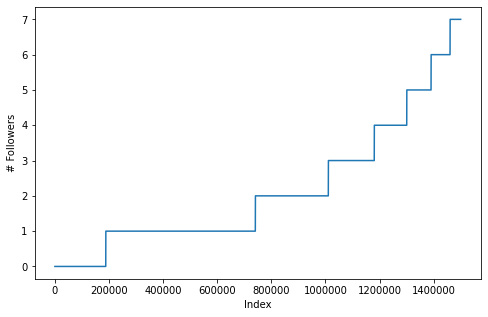

In [156]:
plt.close()
plt.figure(figsize=(8,5))

plt.plot(in_degree_list[:1500000])
plt.xlabel("Index")
plt.ylabel("# Followers")
plt.ticklabel_format(style='plain')

In [157]:
# 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_degree_list,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [158]:
# 99-100 percentile
for i in range(0,11):
    print(99+(i/10),'percentile value is',np.percentile(in_degree_list,99+(i/10)))

99.0 percentile value is 40.0
99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


#### Observations
- 99 percent of the users have less than 40 followers
- 99.9 percent of the users have less than 112 followers
- Highest number of followers any user has is 552

### Following (Out-Degree)

In [159]:
out_degree_list = list(dict(g.out_degree()).values())
out_degree_list.sort()

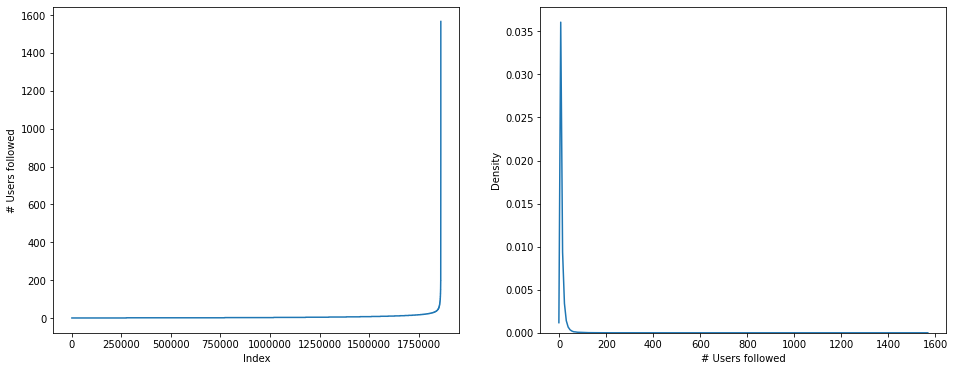

In [160]:
plt.close()
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(out_degree_list)
plt.xlabel("Index")
plt.ylabel("# Users followed")
plt.ticklabel_format(style='plain')

plt.subplot(122)
sns.kdeplot(out_degree_list)
plt.xlabel("# Users followed")
plt.show()

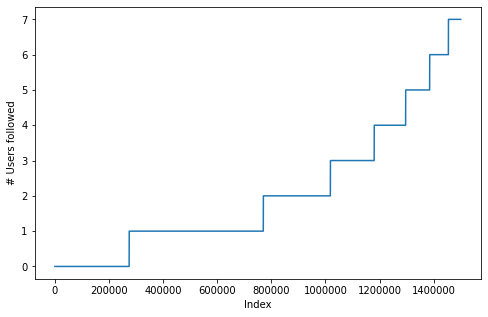

In [161]:
plt.close()
plt.figure(figsize=(8,5))

plt.plot(out_degree_list[:1500000])
plt.xlabel("Index")
plt.ylabel("# Users followed")
plt.ticklabel_format(style='plain')

In [162]:
# 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(out_degree_list,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [163]:
# 99-100 percentile
for i in range(0,11):
    print(99+(i/10),'percentile value is',np.percentile(out_degree_list,99+(i/10)))

99.0 percentile value is 40.0
99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


#### Observations
- 99 percent of the users follow less than 40 users
- 99.9 percent of the users follow less than 123 users
- Highest numbers of users followed by any user is 1566

In [164]:
zero_followers = sum(np.array(in_degree_list)==0)
zero_following = sum(np.array(out_degree_list)==0)
print(f"Number of users with 0 followers are {zero_followers} i.e. {zero_followers*100/len(in_degree_list)} of the total users")
print(f"Number of users with 0 following are {zero_following} i.e. {zero_following*100/len(in_degree_list)} of the total users")

Number of users with 0 followers are 188043 i.e. 10.097786512871734 of the total users
Number of users with 0 following are 274512 i.e. 14.741115442858524 of the total users


### Followers + Following

In [165]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree_list = np.array(list(d.values()))
in_out_degree_list.sort()

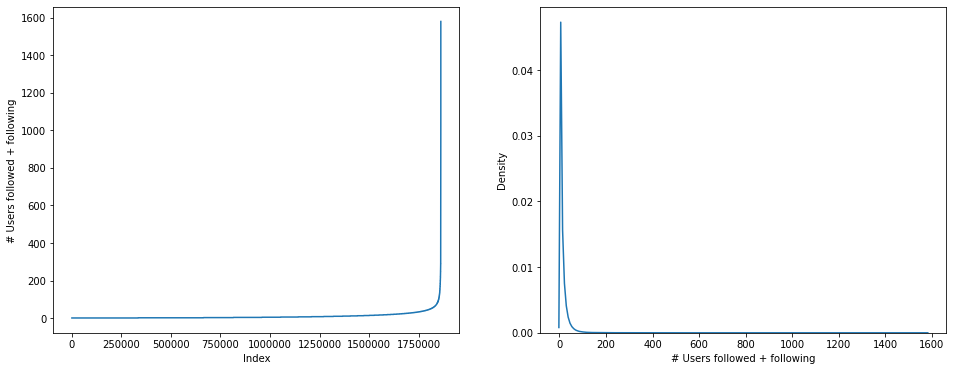

In [166]:
plt.close()
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(in_out_degree_list)
plt.xlabel("Index")
plt.ylabel("# Users followed + following")
plt.ticklabel_format(style='plain')

plt.subplot(122)
sns.kdeplot(in_out_degree_list)
plt.xlabel("# Users followed + following")
plt.show()

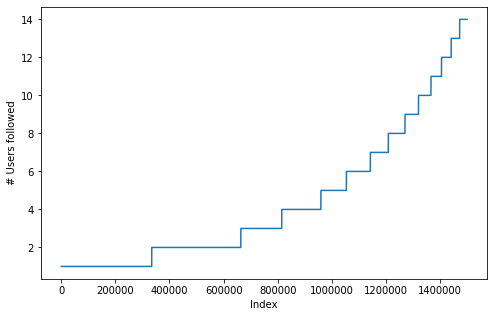

In [167]:
plt.close()
plt.figure(figsize=(8,5))

plt.plot(in_out_degree_list[:1500000])
plt.xlabel("Index")
plt.ylabel("# Users followed")
plt.ticklabel_format(style='plain')

In [168]:
# 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_list,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [169]:
# 99-100 percentile
for i in range(0,11):
    print(99+(i/10),'percentile value is',np.percentile(in_out_degree_list,99+(i/10)))

99.0 percentile value is 79.0
99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


#### Observations
- 99 percent of the users have total following + followers less than 79
- 99.9 percent of the users have total following + followers less than 221
- Highest numbers of following + followers by any user is 1579

In [170]:
min_sum = min(in_out_degree_list)
users_with_min_sum = sum(np.array(in_out_degree_list)==min_sum)
print(f'Minimum number of followers + following is {min_sum}')
print(f'Number of users with {min_sum} followers + following is {users_with_min_sum}')

Minimum number of followers + following is 1
Number of users with 1 followers + following is 334291


### Weak connections

In [171]:
weakly_connected_nodes = list(nx.weakly_connected_components(g))

In [172]:
print(f'Number of weakly connected components are {len(weakly_connected_nodes)}')
count=0
for i in weakly_connected_nodes:
    if len(i)==2:
        count+=1
print(f'Number of weakly connected components with 2 nodes are {count}')

Number of weakly connected components are 45558
Number of weakly connected components with 2 nodes are 32195
